## Projeto Final de Aprendizagem de Máquina

### Objetivo
Este projeto tem como objetivo aplicar os conceitos de Aprendizagem de Máquina (AM) abordados durante a cadeira a problemas práticos enfrentados pela sociedade. Utilizaremos um dataset com aplicabilidade prática relevante para implementar diferentes modelos de AM e comparar seus desempenhos.

### Metodologia
Neste projeto, implementaremos os seguintes modelos de Aprendizagem de Máquina:
- Support Vector Machine (SVM)
- Redes Neurais
- Árvores de Decisão

Cada modelo será treinado utilizando o mesmo conjunto de dados e avaliado com métricas adequadas para comparação de desempenho.

### Estrutura do Projeto
Este notebook foca especificamente na implementação do modelo de Redes Neurais. A análise exploratória dos dados (EDA) e pré-processamento foram realizados em um notebook separado.

1. Carregamento dos dados pré-processados
2. Implementação do modelo de Redes Neurais
3. Treinamento do modelo
4. Avaliação do desempenho
5. Análise dos resultados

Os demais modelos (SVM e Árvores de Decisão) serão implementados em notebooks complementares para posterior comparação de resultados.


In [110]:
# Importando bibliotecas necessárias para redes neurais

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense, Input


In [111]:
df = pd.read_csv("../data/Student_Depression_Cleaned.csv")

df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Family History of Mental Illness,Depression,Weighted Stress,Quality of Life,Efficiency,Risk Group,Academic_Work_Interaction,Academic_Financial_Interaction,Work_Financial_Interaction,Study_CGPA_Interaction
0,2,2,5.0,8.97,2.0,2,3,2,1,3.0,...,0,1,3.4,2.3,2.2425,0,15.0,5.0,3.0,17.94
1,1,1,2.0,5.90,5.0,2,2,2,0,3.0,...,1,0,2.0,2.9,1.4750,0,6.0,4.0,6.0,29.50
2,2,2,3.0,7.03,5.0,1,3,2,0,9.0,...,1,0,2.2,2.8,0.7030,0,27.0,3.0,9.0,35.15
3,1,2,3.0,5.59,2.0,3,2,2,1,4.0,...,1,1,3.8,2.4,1.1180,1,12.0,15.0,20.0,11.18
4,1,2,4.0,8.13,3.0,2,2,3,1,1.0,...,0,0,2.8,2.3,4.0650,0,4.0,4.0,1.0,24.39


In [112]:
df.shape

(27833, 21)

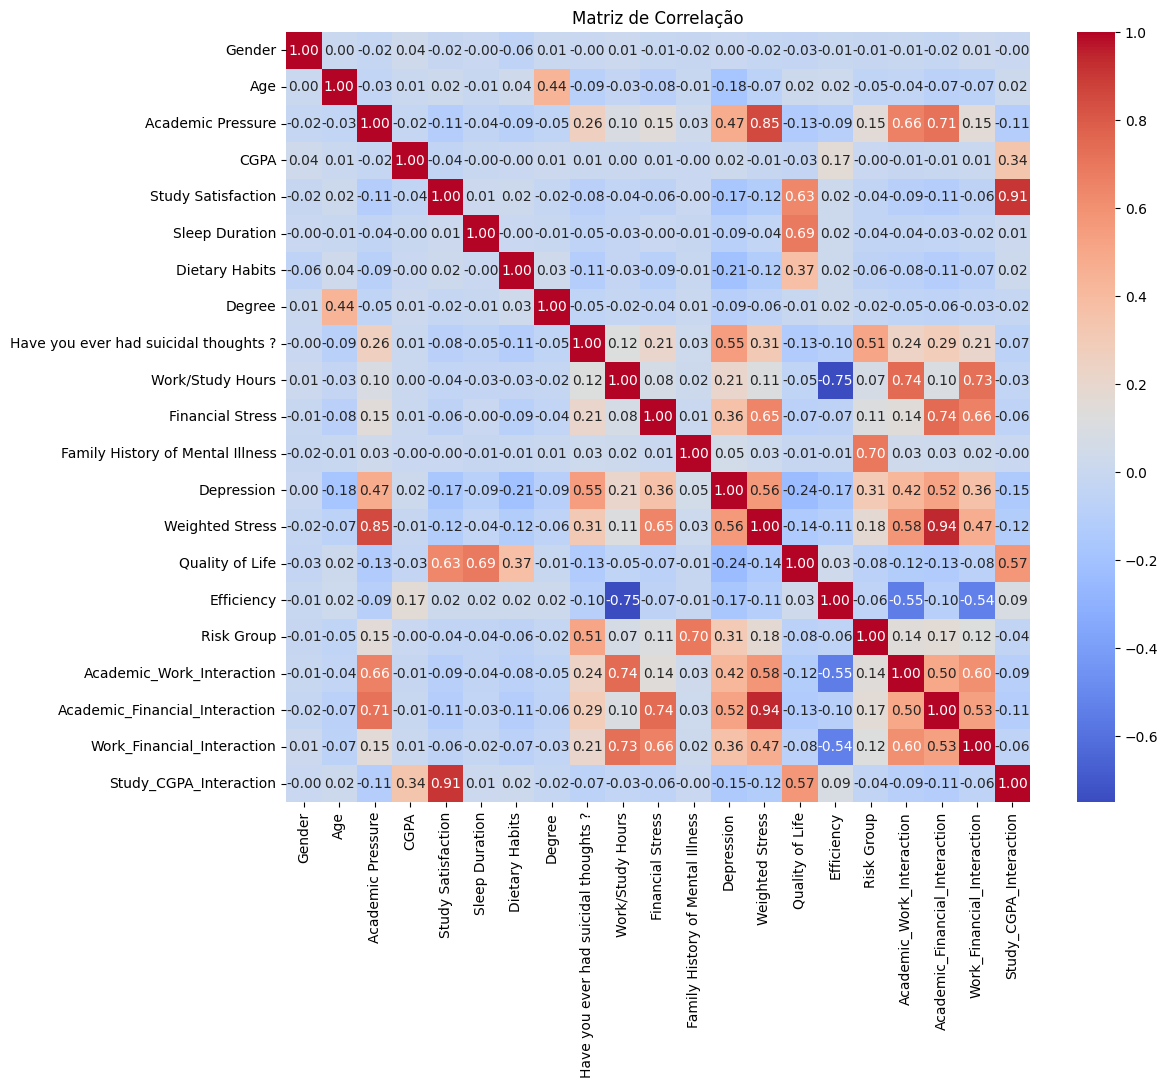

In [113]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Matriz de Correlação')
plt.show()

In [114]:
features = [
    'Academic Pressure', 'Have you ever had suicidal thoughts ?','Weighted Stress','Academic_Work_Interaction',
    'Financial Stress','Risk Group','Academic_Financial_Interaction','Work_Financial_Interaction', 'Depression'
]

df_feature = df[features]

df_feature.head()

,Academic Pressure,Have you ever had suicidal thoughts ?,Weighted Stress,Academic_Work_Interaction,Financial Stress,Risk Group,Academic_Financial_Interaction,Work_Financial_Interaction,Depression
0,5.0,1,3.4,15.0,1.0,0,5.0,3.0,1
1,2.0,0,2.0,6.0,2.0,0,4.0,6.0,0
2,3.0,0,2.2,27.0,1.0,0,3.0,9.0,0
3,3.0,1,3.8,12.0,5.0,1,15.0,20.0,1
4,4.0,1,2.8,4.0,1.0,0,4.0,1.0,0


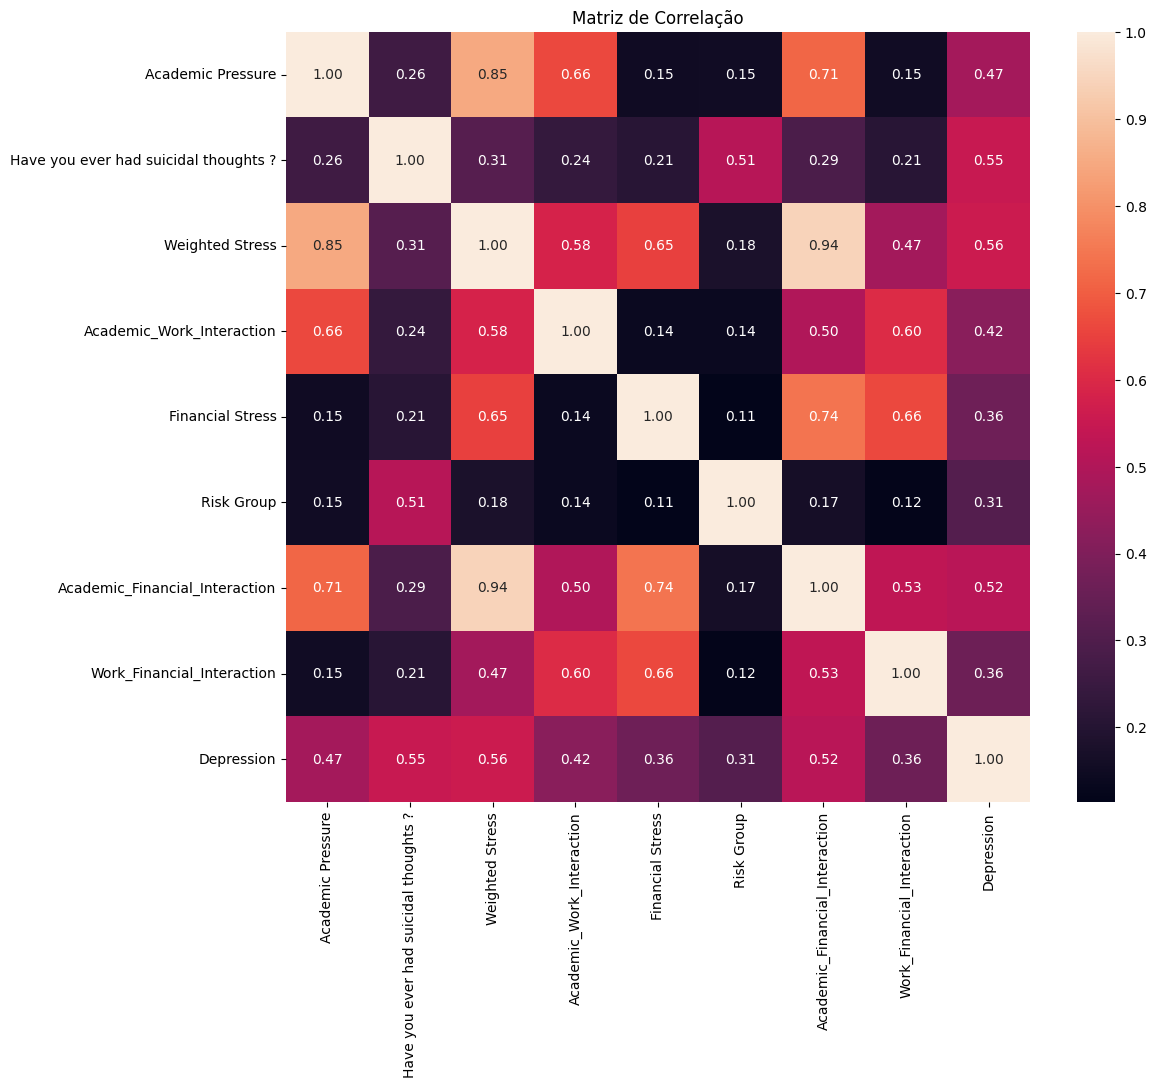

In [115]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_feature.corr(), annot=True, fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [116]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27833 entries, 0 to 27832
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Academic Pressure                      27833 non-null  float64
 1   Have you ever had suicidal thoughts ?  27833 non-null  int64  
 2   Weighted Stress                        27833 non-null  float64
 3   Academic_Work_Interaction              27833 non-null  float64
 4   Financial Stress                       27833 non-null  float64
 5   Risk Group                             27833 non-null  int64  
 6   Academic_Financial_Interaction         27833 non-null  float64
 7   Work_Financial_Interaction             27833 non-null  float64
 8   Depression                             27833 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 1.9 MB


In [117]:
print("\nDistribuição da variável target (Depression):")
print(df['Depression'].value_counts())


Distribuição da variável target (Depression):
Depression
1    16297
0    11536
Name: count, dtype: int64


In [118]:
print("\nPercentual por classe:")
print(df['Depression'].value_counts(normalize=True) * 100)


Percentual por classe:
Depression
1    58.552797
0    41.447203
Name: proportion, dtype: float64


In [119]:
print("\nValores únicos por feature:")
for feature in features:
    print(f"{feature}: {df[feature].nunique()} valores únicos\n")


Valores únicos por feature:
Academic Pressure: 6 valores únicos

Have you ever had suicidal thoughts ?: 2 valores únicos

Weighted Stress: 21 valores únicos

Academic_Work_Interaction: 36 valores únicos

Financial Stress: 5 valores únicos

Risk Group: 2 valores únicos

Academic_Financial_Interaction: 15 valores únicos

Work_Financial_Interaction: 36 valores únicos

Depression: 2 valores únicos



In [120]:
BATCH_SIZE = 128
RANDOM_STATE = 42

X = df[features[:-1]]  # Todas as features exceto 'Depression'
y = df['Depression']   # Target


In [121]:

print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")

Shape de X: (27833, 8)
Shape de y: (27833,)


In [122]:
mean = X.mean(axis=0)
std = X.std(axis=0)

X -= mean
X /=std

In [123]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print("\nDivisão dos dados:\n")
print(f"Treino: \nX={X_train.shape}, y={y_train.shape}")
print(f"\nTeste: \nX={X_test.shape}, y={y_test.shape}")


Divisão dos dados:

Treino: 
X=(22266, 8), y=(22266,)

Teste: 
X=(5567, 8), y=(5567,)


In [124]:
model = Sequential()

model.add(Input(shape=(8,)))

model.add(Dense(4, kernel_initializer='normal', activation='tanh')) 
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


In [125]:
initial_weights = model.get_weights()

sgd = keras.optimizers.SGD(learning_rate=0.01)

model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])


model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [126]:
model.set_weights(initial_weights)
history = model.fit(X_train, y_train, epochs=100, batch_size=BATCH_SIZE)

Epoch 1/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6139 - loss: 0.6779  
Epoch 2/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7457 - loss: 0.6276  
Epoch 3/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8040 - loss: 0.5433
Epoch 4/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8110 - loss: 0.4764
Epoch 5/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8172 - loss: 0.4391
Epoch 6/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8210 - loss: 0.4196
Epoch 7/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8227 - loss: 0.4091
Epoch 8/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8245 - loss: 0.4035  
Epoch 9/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8261 - loss: 0.4003
Epoch 10/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8269 - loss: 0.3984
Epoch 11/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8280 - loss: 0.3972
Epoch 12/100
174/174 ━━━━━━━━━━━━━━

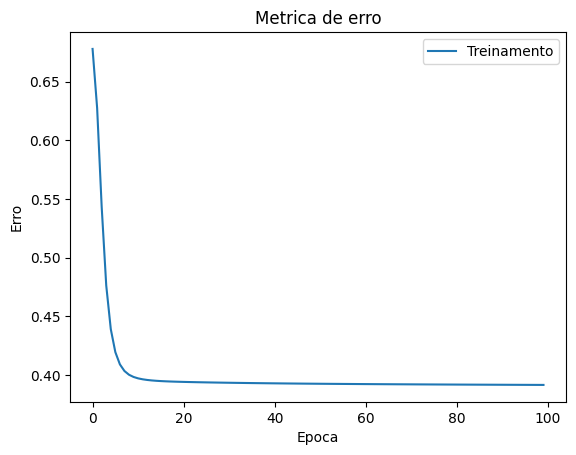

In [128]:
plt.plot(history.history['loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

### Overfitt

In [129]:
# Obtendo a acuracia no conjunto de treinamento
E_in, acc_train = model.evaluate(X_train, y_train, verbose=0)

# Obtendo a acuracia no conjunto de teste
E_out, acc_test = model.evaluate(X_test, y_test, verbose=0)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (teste): {acc_test:.4f}')
print(f"--> E_out - E_in = {E_out - E_in:.4f}")
print(f"--> acc_train - acc_test = {acc_train - acc_test:.4f}")


--> Acuracia (treino): 0.8282
--> Acuracia (teste): 0.8428
--> E_out - E_in = -0.0250
--> acc_train - acc_test = -0.0146


In [132]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn import model_selection

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, random_state=RANDOM_STATE, test_size=0.2)

# Criando a arquitetura da rede neural
model = Sequential()

# Camada de entrada
model.add(Input(shape=(8,)))
model.add(Dense(30, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(30, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(30, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))

# Obtém os pesos iniciais da rede
initial_weights = model.get_weights()

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,161 (8.44 KB)

 Trainable params: 2,161 (8.44 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
model.set_weights(initial_weights)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=BATCH_SIZE)

Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7548 - loss: 0.5341 - val_accuracy: 0.8133 - val_loss: 0.4180
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8197 - loss: 0.4012 - val_accuracy: 0.8196 - val_loss: 0.4089
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8219 - loss: 0.3974 - val_accuracy: 0.8200 - val_loss: 0.4062
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8227 - loss: 0.3957 - val_accuracy: 0.8211 - val_loss: 0.4047
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8237 - loss: 0.3948 - val_accuracy: 0.8214 - val_loss: 0.4040
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8237 - loss: 0.3943 - val_accuracy: 0.8218 - val_loss: 0.4036
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8240 - loss: 0.3937 - val_accuracy: 0.8214 - val_loss: 0.4033
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8245 - loss: 0.3933 - val_accuracy: 0.8221 - v

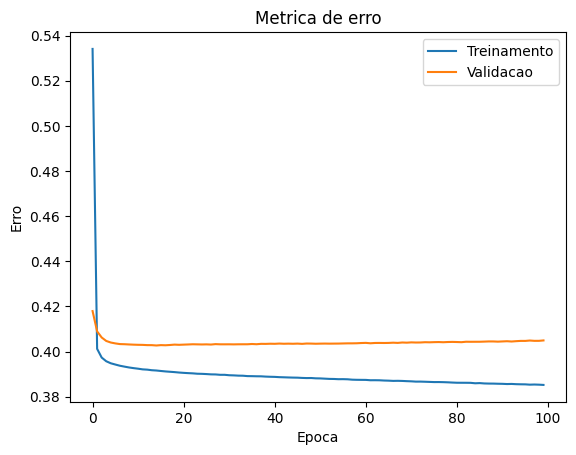

--> E_val - E_in = 0.0216
--> Acuracia (treino): 0.8286
--> Acuracia (validacao): 0.8200
--> acc_train - acc_test = 0.0086


In [134]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

# Obtendo a acuracia no conjunto de treinamento
E_in, acc_train = model.evaluate(X_train, y_train, verbose=0)

# Obtendo a acuracia no conjunto de validacao
E_val, acc_val = model.evaluate(X_val, y_val, verbose=0)

print(f"--> E_val - E_in = {E_val - E_in:.4f}")
print(f'--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_test = {acc_train - acc_val:.4f}")